# Load Data



In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# **Beef & Chicken Fresh & Not Fresh**

---



In [ ]:
from PIL import Image
#Load data Sapi vs Ayam
data_dir = '/content/drive/MyDrive/Capstone Project - Yaudaah, Boleeeh, Tenaang/Dataset/dataset_custom_nonkaggle'  # Ganti dengan path gambar Anda di Google Drive


In [ ]:
os.listdir(data_dir)

['chicken not fresh', 'chicken fresh', 'beef not fresh', 'beef fresh ']

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
      image_path = os.path.join(data_dir, image_class, image)
      try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print('Image not in ext list {}'.format(image_path))
          os.remove(image_path)
      except Exception as e:
        print('Issue with image {}'.format(image_path))

Image not in ext list /content/drive/MyDrive/Capstone Project - Yaudaah, Boleeeh, Tenaang/Dataset/dataset_custom_nonkaggle/beef fresh /671.jpeg


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Capstone Project - Yaudaah, Boleeeh, Tenaang/Dataset/dataset_custom_nonkaggle')

Found 485 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
# 0 = Beef Fresh
# 1 = Beef Not Fresh
# 2 = Chicken Fresh
# 3 = Chicken Not Fresh
batch[1]

array([0, 3, 3, 2, 0, 1, 2, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 1, 0, 3,
       2, 1, 1, 1, 2, 0, 3, 0, 3, 2], dtype=int32)

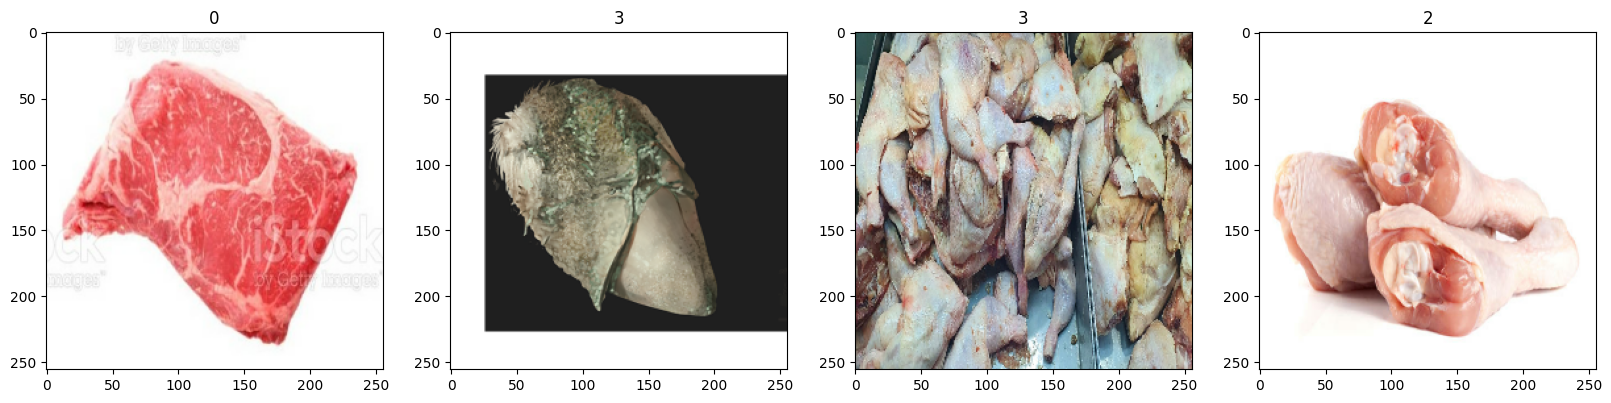

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

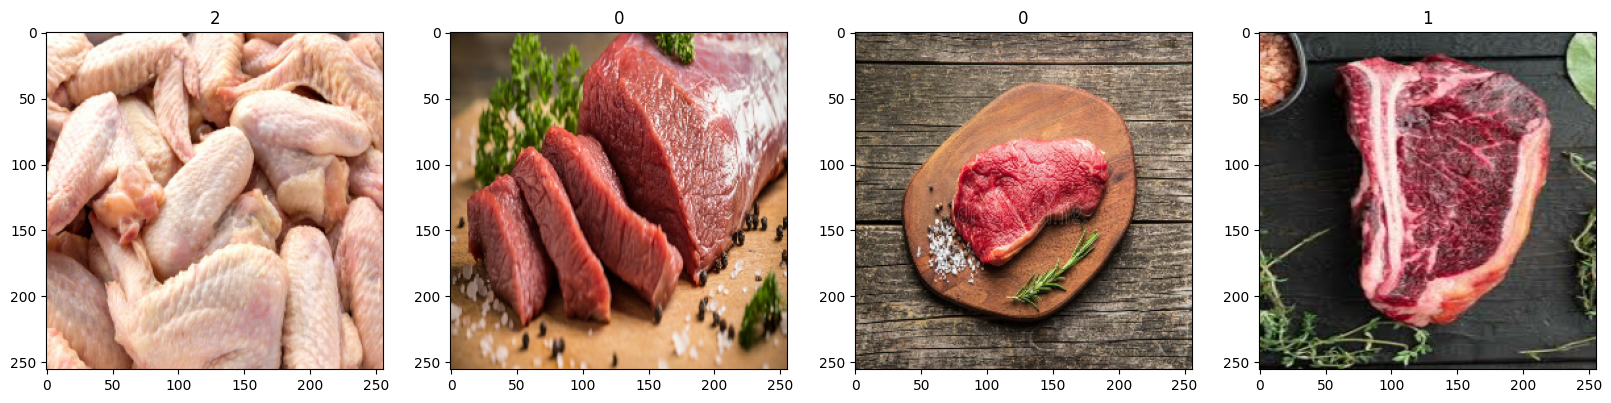

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Split Data

In [ ]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.3)
test_size = int(len(data)*0.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

DATA AUGMENTATION


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

height = 128
width = 128

img_aug = Sequential(
    [
        layers.RandomRotation(factor=0.2),
        layers.RandomTranslation(height_factor=0.15, width_factor=0.15),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.15),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        layers.Lambda(lambda x: tf.keras.backend.expand_dims(x, axis=0)),
        layers.Lambda(lambda x: image.random_shear(x[0], shear=0.2)),
        layers.Lambda(lambda x: tf.keras.backend.squeeze(x, axis=0)),
        layers.RandomBrightness(factor=0.2),
        layers.RandomCrop(height, width),
        # layers.GlobalAveragePooling2D(),
        # tf.keras.layers.Dropout(.2),
        # tf.keras.layers.Dense(4, activation="softmax")
    ],
    name="img_aug",
)


# Save Model

In [ ]:
from keras.models import load_model

def save_model(model, nama_file):
  files = nama_file+'.h5'
  model.save(files)

# Data Modelling

## CNN

#### ReLu

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, MaxPool2D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Creating a Sequential model
model_CNN_ReLU = Sequential()
model_CNN_ReLU.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3), kernel_regularizer=regularizers.l2(0.001)))
model_CNN_ReLU.add(MaxPooling2D())

model_CNN_ReLU.add(Conv2D(32, (3,3), 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_CNN_ReLU.add(MaxPooling2D())

model_CNN_ReLU.add(Conv2D(16, (3,3), 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_CNN_ReLU.add(MaxPooling2D())

model_CNN_ReLU.add(Flatten())

model_CNN_ReLU.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_CNN_ReLU.add(Dense(4, activation='softmax'))

model_CNN_ReLU.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist_CNN_ReLU = model_CNN_ReLU.fit(train, epochs=200, validation_data=val, verbose=2, batch_size=16)


Epoch 1/200
9/9 - 8s - loss: 2.3117 - accuracy: 0.3125 - val_loss: 1.7063 - val_accuracy: 0.4922 - 8s/epoch - 873ms/step
Epoch 2/200
9/9 - 9s - loss: 1.6176 - accuracy: 0.4167 - val_loss: 1.4759 - val_accuracy: 0.5078 - 9s/epoch - 989ms/step
Epoch 3/200
9/9 - 9s - loss: 1.4517 - accuracy: 0.4965 - val_loss: 1.2629 - val_accuracy: 0.6094 - 9s/epoch - 981ms/step
Epoch 4/200
9/9 - 7s - loss: 1.2101 - accuracy: 0.5972 - val_loss: 1.1146 - val_accuracy: 0.6562 - 7s/epoch - 822ms/step
Epoch 5/200
9/9 - 9s - loss: 1.0725 - accuracy: 0.6632 - val_loss: 0.9635 - val_accuracy: 0.7031 - 9s/epoch - 963ms/step
Epoch 6/200
9/9 - 9s - loss: 0.9961 - accuracy: 0.6944 - val_loss: 0.9780 - val_accuracy: 0.6562 - 9s/epoch - 974ms/step
Epoch 7/200
9/9 - 7s - loss: 0.9509 - accuracy: 0.7292 - val_loss: 0.9058 - val_accuracy: 0.7344 - 7s/epoch - 820ms/step
Epoch 8/200
9/9 - 7s - loss: 0.7827 - accuracy: 0.7847 - val_loss: 0.7457 - val_accuracy: 0.8125 - 7s/epoch - 817ms/step
Epoch 9/200
9/9 - 9s - loss: 0.7

# Evaluate

##Plot Performance

### CNN (ReLU)

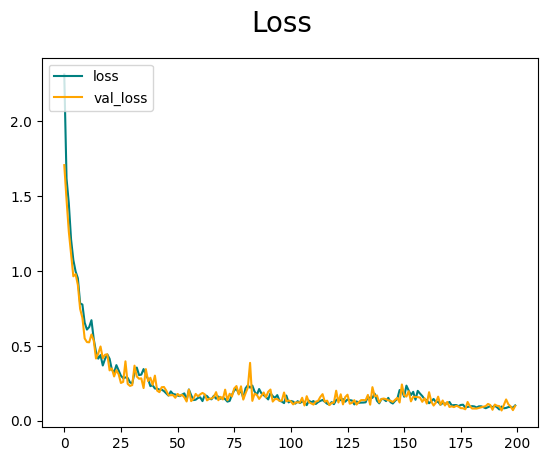

In [ ]:
fig = plt.figure()
plt.plot(hist_CNN_ReLU.history['loss'], color='teal', label='loss')
plt.plot(hist_CNN_ReLU.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

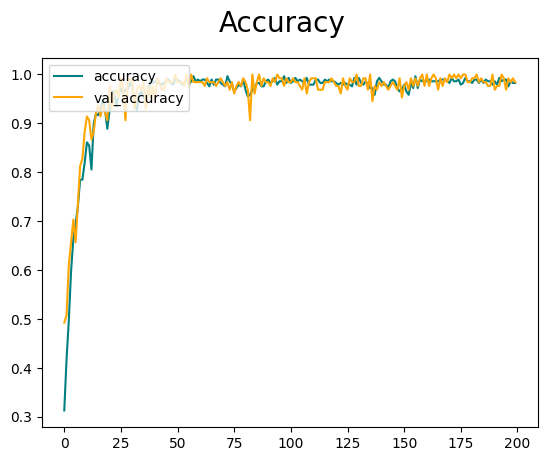

In [ ]:
fig = plt.figure()
plt.plot(hist_CNN_ReLU.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_CNN_ReLU.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Precision, Recall, Accuracy

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [ ]:
pre = Precision()
re = Recall()
acc = Accuracy()



### CNN (ReLU)

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model_CNN_ReLU.predict(X)
    y_classes = yhat.argmax(axis=-1)
    pre.update_state(y, y_classes)
    re.update_state(y, y_classes)
    acc.update_state(y, y_classes)

1/1 [==============================] - 0s 47ms/step


In [ ]:
print('Precision:',pre.result().numpy(),'Recall:', re.result().numpy(),'Accuracy:',acc.result().numpy())

Precision: 1.0 Recall: 1.0 Accuracy: 1.0


#Test

In [ ]:
import cv2

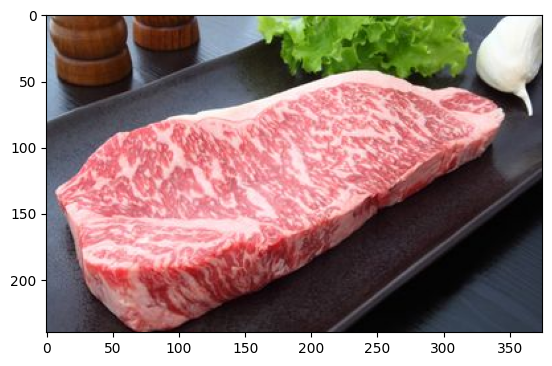

In [ ]:
img = cv2.imread('/content/daguing segar.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

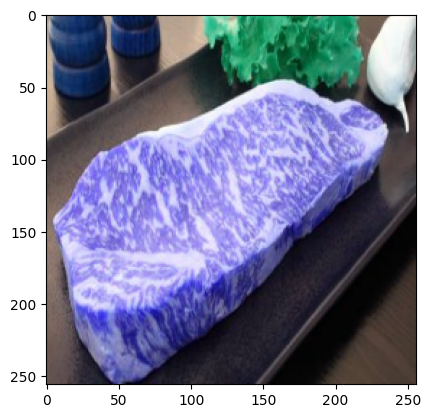

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

## CNN ReLU

In [ ]:
yhat = model_CNN_ReLU.predict(np.expand_dims(resize/255, 0))

yhat_max_idx = np.argmax(yhat)

def predict_meat(y):
  if y == 0:
    print(f'Predicted class is Fresh Beef')
  elif y == 1:
    print(f'Predicted class is Not Fresh Beef')
  elif y == 2:
    print(f'Predicted class is Fresh Chicken')
  elif y == 3:
    print(f'Predicted class is Not Fresh Chicken')
  print('with probability of ', np.round(yhat[0][yhat_max_idx]*100, 2), '%', sep = "")
predict_meat(yhat_max_idx)

1/1 [==============================] - 0s 24ms/step
Predicted class is Fresh Beef
with probability of 81.48%


# Model Saving

## CNN ReLU

In [ ]:
save_model(model_CNN_ReLU, 'CNN ReLU') #contoh save model

In [ ]:
model_CNN_ReLU = load_model('CNN ReLU.h5') #contoh load model

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('CNN ReLU.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as file:
    file.write(tflite_model)

In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="/content/meatmodel.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))